In [2]:
import pickle

path = "../data/sapsam/evaluations/"
zero_shot = pickle.load(open(path + "zero-shot_evaluation.pkl", "rb"))
one_shot = pickle.load(open(path + "one-shot_evaluation.pkl", "rb"))
few_shot = pickle.load(open(path + "few-shot_evaluation.pkl", "rb"))

In [3]:
import numpy as np, scipy.stats as st


def condfidence_interval(data):
    return st.t.interval(0.95, len(data) - 1, loc=np.mean(data), scale=st.sem(data))


def get_confidence_interval(data):
    lower = []
    upper = []
    for i in data.columns:
        lower.append(condfidence_interval(data[i])[0])
        upper.append(condfidence_interval(data[i])[1])
    return lower, upper

### confidence interval

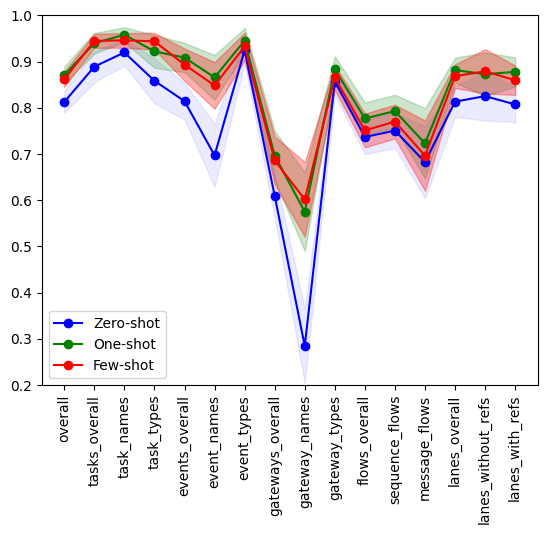

In [4]:
import matplotlib.pyplot as plt


files = [zero_shot, one_shot, few_shot]
labels = ["Zero-shot", "One-shot", "Few-shot"]
colors = ["blue", "green", "red"]
alphas = [0.08, 0.2, 0.3]

for i, j in enumerate(files):

    lower, upper = get_confidence_interval(j)

    plt.plot(range(1, 17), j.mean(), "-o", label=labels[i], color=colors[i])
    plt.fill_between(range(1, 17), lower, upper, alpha=alphas[i], color=colors[i])
    plt.xticks(range(1, 17), j.columns.to_list(), rotation=90)
    plt.ylim([0.2, 1])
plt.legend()

### medians/quantiles

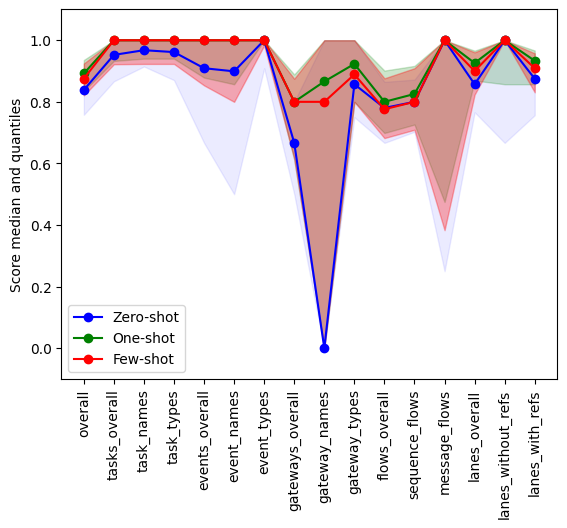

In [5]:
import matplotlib.pyplot as plt

# I want to put the zero-shot, one-shot, and few-shot results in the same plot

files = [zero_shot, one_shot, few_shot]
labels = ["Zero-shot", "One-shot", "Few-shot"]
colors = ["blue", "green", "red"]
alphas = [0.08, 0.2, 0.3]


for i, j in enumerate(files):

    mean = j.mean()
    median = j.median()

    lower = j.quantile(0.25)
    upper = j.quantile(0.75)

    # plt.plot(range(1, 17), mean, "--", label=labels[i], color=colors[i])
    plt.plot(range(1, 17), median, "-o", label=labels[i], color=colors[i])
    plt.fill_between(range(1, 17), lower, upper, alpha=alphas[i], color=colors[i])
    plt.xticks(range(1, 17), j.columns.to_list(), rotation=90)
    plt.ylim([-0.1, 1.1])
plt.legend()
plt.ylabel("Score median and quantiles")
plt.savefig("/Users/I741988/Desktop/median_quantiles.png")

### mean/standard deviation

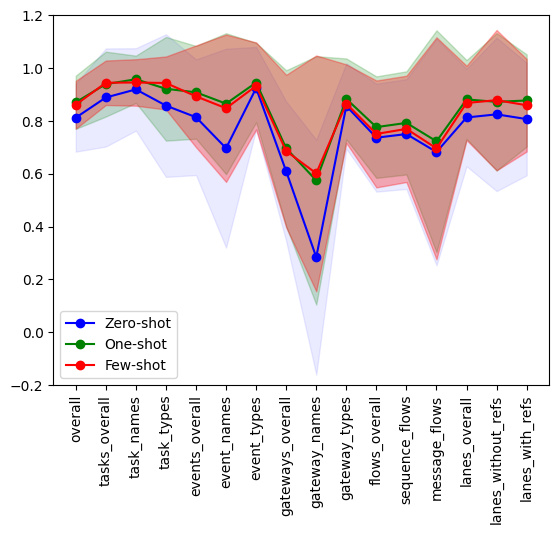

In [6]:
import matplotlib.pyplot as plt

# I want to put the zero-shot, one-shot, and few-shot results in the same plot

files = [zero_shot, one_shot, few_shot]
labels = ["Zero-shot", "One-shot", "Few-shot"]
colors = ["blue", "green", "red"]
alphas = [0.08, 0.2, 0.3]


for i, j in enumerate(files):

    lower = j.mean(axis=0) - j.std(axis=0)
    upper = j.mean(axis=0) + j.std(axis=0)
    mean = j.mean(axis=0)

    plt.plot(range(1, 17), mean, "-o", label=labels[i], color=colors[i])
    # plt.plot(range(1, 17), median, "-o", label=labels[i], color=colors[i])
    plt.fill_between(range(1, 17), lower, upper, alpha=alphas[i], color=colors[i])
    plt.xticks(range(1, 17), j.columns.to_list(), rotation=90)
    plt.ylim([-0.2, 1.2])
plt.legend(loc="lower left")